-----------
Initializing structure...
time for choose_chunkdivision = 0.000757217 s
Working in 2D dimensions.
Computational cell is 10 x 10 x 0 with resolution 40
     block, center = (0,2.35,0)
          size (1e+20,0.4,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (11.9025,11.9025,11.9025)
     block, center = (0,-2.35,0)
          size (1e+20,0.4,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (11.9025,11.9025,11.9025)
     cylinder, center = (0,0,0)
          radius 2, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (11.9025,11.9025,11.9025)
     cylinder, center = (0,0,0)
          radius 1.5, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
time for set_epsilon = 0.439338 s
-----------


FloatProgress(value=0.0, description='0% done ', max=2000.0)

Meep progress: 63.175000000000004/2000.0 = 3.2% done in 4.0s, 122.6s to go
on time step 5060 (time=63.25), 0.000790536 s/step
Meep progress: 125.7125/2000.0 = 6.3% done in 8.0s, 119.3s to go
on time step 10065 (time=125.812), 0.000799334 s/step
Meep progress: 195.525/2000.0 = 9.8% done in 12.0s, 110.8s to go
on time step 15656 (time=195.7), 0.000715525 s/step
Meep progress: 283.425/2000.0 = 14.2% done in 16.0s, 96.9s to go
on time step 22692 (time=283.65), 0.000568579 s/step
Meep progress: 371.375/2000.0 = 18.6% done in 20.0s, 87.7s to go
on time step 29731 (time=371.638), 0.000568342 s/step
Meep progress: 458.4125/2000.0 = 22.9% done in 24.0s, 80.7s to go
on time step 36697 (time=458.713), 0.000574221 s/step
Meep progress: 546.0500000000001/2000.0 = 27.3% done in 28.0s, 74.6s to go
on time step 43709 (time=546.363), 0.000570454 s/step
Meep progress: 634.0250000000001/2000.0 = 31.7% done in 32.0s, 68.9s to go
on time step 50750 (time=634.375), 0.000568152 s/step
Meep progress: 722.0125

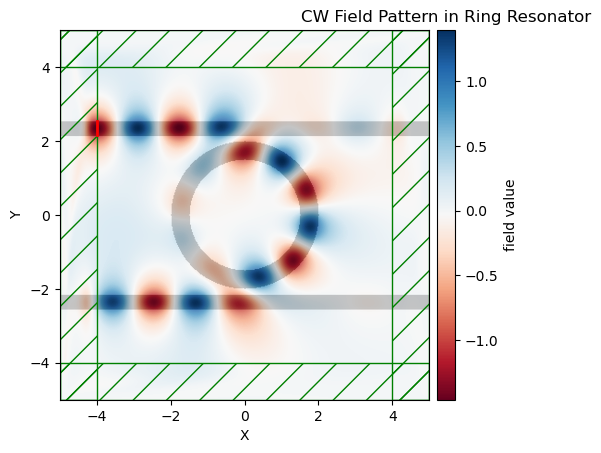

In [3]:
import meep as mp
import numpy as np
import matplotlib.pyplot as plt

###############################################################################
# 基本參數
###############################################################################
resolution = 40
n_core = 3.45
n_bg = 1.0

wvg_width = 0.4
outer_r = 2.0
inner_r = 1.5
gap = 0.15

cell = mp.Vector3(10, 10, 0)
pml = [mp.PML(1.0)]

###############################################################################
# 幾何結構：微環 + 上下波導
###############################################################################
geometry = [
    mp.Block(size=mp.Vector3(mp.inf, wvg_width, mp.inf),
             center=mp.Vector3(0, outer_r + gap + wvg_width/2),
             material=mp.Medium(index=n_core)),

    mp.Block(size=mp.Vector3(mp.inf, wvg_width, mp.inf),
             center=mp.Vector3(0, -outer_r - gap - wvg_width/2),
             material=mp.Medium(index=n_core)),

    mp.Cylinder(radius=outer_r,
                center=mp.Vector3(0,0),
                height=mp.inf,
                material=mp.Medium(index=n_core)),

    mp.Cylinder(radius=inner_r,
                center=mp.Vector3(0,0),
                height=mp.inf,
                material=mp.Medium(index=n_bg)),
]

###############################################################################
# 單頻連續波光源 (Continuous Wave)
###############################################################################
fcen = 0.20

sources = [
    mp.Source(
        src=mp.ContinuousSource(frequency=fcen),
        component=mp.Ez,
        center=mp.Vector3(-4, outer_r + gap + wvg_width/2),
        size=mp.Vector3(0, wvg_width),
        amplitude=10.0
    )
]

###############################################################################
# 建立模擬
###############################################################################
sim = mp.Simulation(
    cell_size=cell,
    geometry=geometry,
    sources=sources,
    resolution=resolution,
    boundary_layers=pml
)

###############################################################################
# 執行模擬：時間拉長讓場達到 steady state
###############################################################################
sim.run(until=2000)

###############################################################################
# 畫 Ez 場分布
###############################################################################
sim.plot2D(fields=mp.Ez,
           field_parameters={"cmap": "RdBu", "colorbar": True})
plt.title("CW Field Pattern in Ring Resonator")
plt.show()


-----------
Initializing structure...
time for choose_chunkdivision = 0.000262976 s
Working in 2D dimensions.
Computational cell is 10 x 10 x 0 with resolution 40
     block, center = (0,2.35,0)
          size (1e+20,0.4,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (11.9025,11.9025,11.9025)
     block, center = (0,-2.35,0)
          size (1e+20,0.4,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (11.9025,11.9025,11.9025)
     cylinder, center = (0,0,0)
          radius 2, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (11.9025,11.9025,11.9025)
     cylinder, center = (0,0,0)
          radius 1.5, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
time for set_epsilon = 0.314859 s
-----------


FloatProgress(value=0.0, description='0% done ', max=2000.0)

Meep progress: 89.05000000000001/2000.0 = 4.5% done in 4.0s, 85.8s to go
on time step 7129 (time=89.1125), 0.000561128 s/step
Meep progress: 179.07500000000002/2000.0 = 9.0% done in 8.0s, 81.4s to go
on time step 14335 (time=179.188), 0.00055514 s/step
Meep progress: 266.96250000000003/2000.0 = 13.3% done in 12.0s, 77.9s to go
on time step 21365 (time=267.062), 0.000569002 s/step
Meep progress: 358.07500000000005/2000.0 = 17.9% done in 16.0s, 73.4s to go
on time step 28655 (time=358.188), 0.000548786 s/step
Meep progress: 447.0625/2000.0 = 22.4% done in 20.0s, 69.5s to go
on time step 35775 (time=447.188), 0.000561802 s/step
Meep progress: 525.65/2000.0 = 26.3% done in 24.0s, 67.3s to go
on time step 42061 (time=525.763), 0.000636386 s/step
Meep progress: 588.225/2000.0 = 29.4% done in 28.0s, 67.2s to go
on time step 47069 (time=588.363), 0.00079878 s/step
Meep progress: 657.0375/2000.0 = 32.9% done in 32.0s, 65.4s to go
on time step 52581 (time=657.263), 0.000725693 s/step
Meep progre

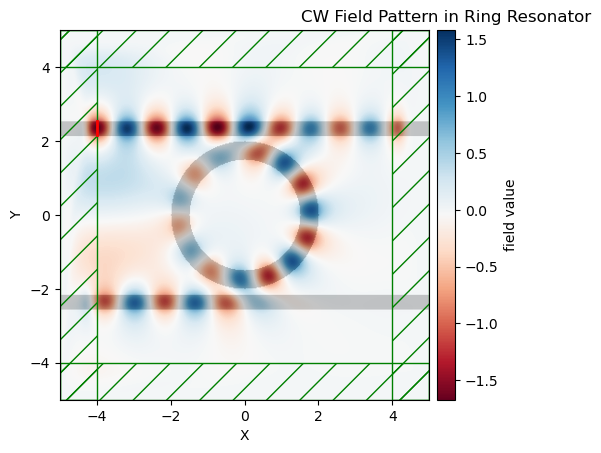

In [6]:
import meep as mp
import numpy as np
import matplotlib.pyplot as plt

###############################################################################
# 基本參數
###############################################################################
resolution = 40
n_core = 3.45
n_bg = 1.0

wvg_width = 0.4
outer_r = 2.0
inner_r = 1.5
gap = 0.15

cell = mp.Vector3(10, 10, 0)
pml = [mp.PML(1.0)]

###############################################################################
# 幾何結構：微環 + 上下波導
###############################################################################
geometry = [
    mp.Block(size=mp.Vector3(mp.inf, wvg_width, mp.inf),
             center=mp.Vector3(0, outer_r + gap + wvg_width/2),
             material=mp.Medium(index=n_core)),

    mp.Block(size=mp.Vector3(mp.inf, wvg_width, mp.inf),
             center=mp.Vector3(0, -outer_r - gap - wvg_width/2),
             material=mp.Medium(index=n_core)),

    mp.Cylinder(radius=outer_r,
                center=mp.Vector3(0,0),
                height=mp.inf,
                material=mp.Medium(index=n_core)),

    mp.Cylinder(radius=inner_r,
                center=mp.Vector3(0,0),
                height=mp.inf,
                material=mp.Medium(index=n_bg)),
]

###############################################################################
# 單頻連續波光源 (Continuous Wave)
###############################################################################
fcen = 0.25

sources = [
    mp.Source(
        src=mp.ContinuousSource(frequency=fcen),
        component=mp.Ez,
        center=mp.Vector3(-4, outer_r + gap + wvg_width/2),
        size=mp.Vector3(0, wvg_width),
        amplitude=10.0
    )
]

###############################################################################
# 建立模擬
###############################################################################
sim = mp.Simulation(
    cell_size=cell,
    geometry=geometry,
    sources=sources,
    resolution=resolution,
    boundary_layers=pml
)

###############################################################################
# 執行模擬：時間拉長讓場達到 steady state
###############################################################################
sim.run(until=2000)

###############################################################################
# 畫 Ez 場分布
###############################################################################
sim.plot2D(fields=mp.Ez,
           field_parameters={"cmap": "RdBu", "colorbar": True})
plt.title("CW Field Pattern in Ring Resonator")
plt.show()


-----------
Initializing structure...
time for choose_chunkdivision = 0.000272989 s
Working in 2D dimensions.
Computational cell is 10 x 10 x 0 with resolution 40
     block, center = (0,2.35,0)
          size (1e+20,0.4,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (11.9025,11.9025,11.9025)
     block, center = (0,-2.35,0)
          size (1e+20,0.4,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (11.9025,11.9025,11.9025)
     cylinder, center = (0,0,0)
          radius 2, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (11.9025,11.9025,11.9025)
     cylinder, center = (0,0,0)
          radius 1.5, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
time for set_epsilon = 0.326779 s
-----------


FloatProgress(value=0.0, description='0% done ', max=2000.0)

Meep progress: 81.92500000000001/2000.0 = 4.1% done in 4.0s, 93.7s to go
on time step 6559 (time=81.9875), 0.000609882 s/step
Meep progress: 165.5/2000.0 = 8.3% done in 8.0s, 88.7s to go
on time step 13249 (time=165.613), 0.000598017 s/step
Meep progress: 249.5/2000.0 = 12.5% done in 12.0s, 84.2s to go
on time step 19972 (time=249.65), 0.000595028 s/step
Meep progress: 334.3625/2000.0 = 16.7% done in 16.0s, 79.7s to go
on time step 26764 (time=334.55), 0.000588959 s/step
Meep progress: 417.76250000000005/2000.0 = 20.9% done in 20.0s, 75.8s to go
on time step 33438 (time=417.975), 0.000599402 s/step
Meep progress: 501.9875/2000.0 = 25.1% done in 24.0s, 71.6s to go
on time step 40180 (time=502.25), 0.000593367 s/step
Meep progress: 584.45/2000.0 = 29.2% done in 28.0s, 67.8s to go
on time step 46774 (time=584.675), 0.000606614 s/step
Meep progress: 669.7375000000001/2000.0 = 33.5% done in 32.0s, 63.6s to go
on time step 53604 (time=670.05), 0.00058571 s/step
Meep progress: 754.33750000000

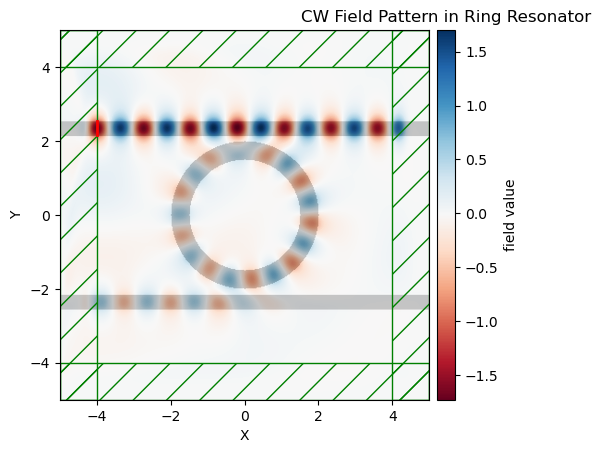

In [10]:
import meep as mp
import numpy as np
import matplotlib.pyplot as plt

###############################################################################
# 基本參數
###############################################################################
resolution = 40
n_core = 3.45
n_bg = 1.0

wvg_width = 0.4
outer_r = 2.0
inner_r = 1.5
gap = 0.15

cell = mp.Vector3(10, 10, 0)
pml = [mp.PML(1.0)]

###############################################################################
# 幾何結構：微環 + 上下波導
###############################################################################
geometry = [
    mp.Block(size=mp.Vector3(mp.inf, wvg_width, mp.inf),
             center=mp.Vector3(0, outer_r + gap + wvg_width/2),
             material=mp.Medium(index=n_core)),

    mp.Block(size=mp.Vector3(mp.inf, wvg_width, mp.inf),
             center=mp.Vector3(0, -outer_r - gap - wvg_width/2),
             material=mp.Medium(index=n_core)),

    mp.Cylinder(radius=outer_r,
                center=mp.Vector3(0,0),
                height=mp.inf,
                material=mp.Medium(index=n_core)),

    mp.Cylinder(radius=inner_r,
                center=mp.Vector3(0,0),
                height=mp.inf,
                material=mp.Medium(index=n_bg)),
]

###############################################################################
# 單頻連續波光源 (Continuous Wave)
###############################################################################
fcen = 0.3

sources = [
    mp.Source(
        src=mp.ContinuousSource(frequency=fcen),
        component=mp.Ez,
        center=mp.Vector3(-4, outer_r + gap + wvg_width/2),
        size=mp.Vector3(0, wvg_width),
        amplitude=10.0
    )
]

###############################################################################
# 建立模擬
###############################################################################
sim = mp.Simulation(
    cell_size=cell,
    geometry=geometry,
    sources=sources,
    resolution=resolution,
    boundary_layers=pml
)

###############################################################################
# 執行模擬：時間拉長讓場達到 steady state
###############################################################################
sim.run(until=2000)

###############################################################################
# 畫 Ez 場分布
###############################################################################
sim.plot2D(fields=mp.Ez,
           field_parameters={"cmap": "RdBu", "colorbar": True})
plt.title("CW Field Pattern in Ring Resonator")
plt.show()


-----------
Initializing structure...
time for choose_chunkdivision = 0.000370026 s
Working in 2D dimensions.
Computational cell is 10 x 10 x 0 with resolution 40
     block, center = (0,2.35,0)
          size (1e+20,0.4,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (11.9025,11.9025,11.9025)
     block, center = (0,-2.35,0)
          size (1e+20,0.4,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (11.9025,11.9025,11.9025)
     cylinder, center = (0,0,0)
          radius 2, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (11.9025,11.9025,11.9025)
     cylinder, center = (0,0,0)
          radius 1.5, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
time for set_epsilon = 0.443597 s
-----------


FloatProgress(value=0.0, description='0% done ', max=2000.0)

Meep progress: 62.0375/2000.0 = 3.1% done in 4.0s, 125.0s to go
on time step 4969 (time=62.1125), 0.00080511 s/step
Meep progress: 124.775/2000.0 = 6.2% done in 8.0s, 120.2s to go
on time step 9994 (time=124.925), 0.000796055 s/step
Meep progress: 214.26250000000002/2000.0 = 10.7% done in 12.0s, 100.0s to go
on time step 17152 (time=214.4), 0.000558868 s/step
Meep progress: 304.0125/2000.0 = 15.2% done in 16.0s, 89.3s to go
on time step 24335 (time=304.188), 0.000556873 s/step
Meep progress: 391.52500000000003/2000.0 = 19.6% done in 20.0s, 82.2s to go
on time step 31338 (time=391.725), 0.000571204 s/step
Meep progress: 461.9375/2000.0 = 23.1% done in 24.0s, 79.9s to go
on time step 36968 (time=462.1), 0.000710538 s/step
Meep progress: 530.8000000000001/2000.0 = 26.5% done in 28.0s, 77.5s to go
on time step 42484 (time=531.05), 0.000725267 s/step
Meep progress: 616.725/2000.0 = 30.8% done in 32.0s, 71.8s to go
on time step 49362 (time=617.025), 0.00058158 s/step
Meep progress: 702.6375/

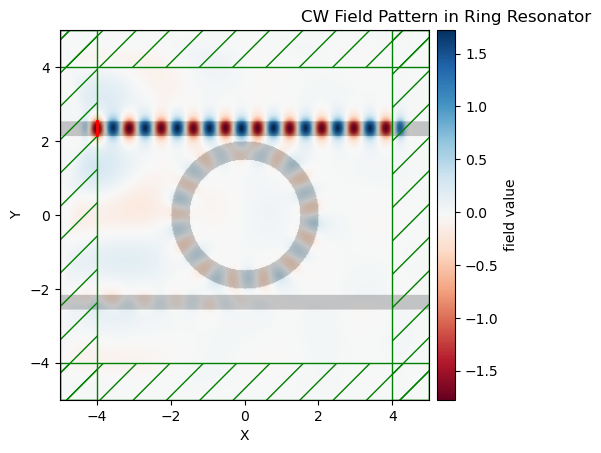

In [8]:
import meep as mp
import numpy as np
import matplotlib.pyplot as plt

###############################################################################
# 基本參數
###############################################################################
resolution = 40
n_core = 3.45
n_bg = 1.0

wvg_width = 0.4
outer_r = 2.0
inner_r = 1.5
gap = 0.15

cell = mp.Vector3(10, 10, 0)
pml = [mp.PML(1.0)]

###############################################################################
# 幾何結構：微環 + 上下波導
###############################################################################
geometry = [
    mp.Block(size=mp.Vector3(mp.inf, wvg_width, mp.inf),
             center=mp.Vector3(0, outer_r + gap + wvg_width/2),
             material=mp.Medium(index=n_core)),

    mp.Block(size=mp.Vector3(mp.inf, wvg_width, mp.inf),
             center=mp.Vector3(0, -outer_r - gap - wvg_width/2),
             material=mp.Medium(index=n_core)),

    mp.Cylinder(radius=outer_r,
                center=mp.Vector3(0,0),
                height=mp.inf,
                material=mp.Medium(index=n_core)),

    mp.Cylinder(radius=inner_r,
                center=mp.Vector3(0,0),
                height=mp.inf,
                material=mp.Medium(index=n_bg)),
]

###############################################################################
# 單頻連續波光源 (Continuous Wave)
###############################################################################
fcen = 0.4

sources = [
    mp.Source(
        src=mp.ContinuousSource(frequency=fcen),
        component=mp.Ez,
        center=mp.Vector3(-4, outer_r + gap + wvg_width/2),
        size=mp.Vector3(0, wvg_width),
        amplitude=10.0
    )
]

###############################################################################
# 建立模擬
###############################################################################
sim = mp.Simulation(
    cell_size=cell,
    geometry=geometry,
    sources=sources,
    resolution=resolution,
    boundary_layers=pml
)

###############################################################################
# 執行模擬：時間拉長讓場達到 steady state
###############################################################################
sim.run(until=2000)

###############################################################################
# 畫 Ez 場分布
###############################################################################
sim.plot2D(fields=mp.Ez,
           field_parameters={"cmap": "RdBu", "colorbar": True})
plt.title("CW Field Pattern in Ring Resonator")
plt.show()


-----------
Initializing structure...
time for choose_chunkdivision = 0.000590086 s
Working in 2D dimensions.
Computational cell is 10 x 10 x 0 with resolution 40
     block, center = (0,2.35,0)
          size (1e+20,0.4,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (11.9025,11.9025,11.9025)
     block, center = (0,-2.35,0)
          size (1e+20,0.4,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (11.9025,11.9025,11.9025)
     cylinder, center = (0,0,0)
          radius 2, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (11.9025,11.9025,11.9025)
     cylinder, center = (0,0,0)
          radius 1.5, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
time for set_epsilon = 0.476908 s
-----------


FloatProgress(value=0.0, description='0% done ', max=2000.0)

Meep progress: 62.5125/2000.0 = 3.1% done in 4.0s, 124.0s to go
on time step 5007 (time=62.5875), 0.000799015 s/step
Meep progress: 124.66250000000001/2000.0 = 6.2% done in 8.0s, 120.4s to go
on time step 9981 (time=124.763), 0.000804253 s/step
Meep progress: 209.85000000000002/2000.0 = 10.5% done in 12.0s, 102.4s to go
on time step 16803 (time=210.038), 0.000586415 s/step
Meep progress: 300.725/2000.0 = 15.0% done in 16.0s, 90.4s to go
on time step 24077 (time=300.963), 0.000549927 s/step
Meep progress: 389.83750000000003/2000.0 = 19.5% done in 20.0s, 82.6s to go
on time step 31207 (time=390.088), 0.000561012 s/step
Meep progress: 481.26250000000005/2000.0 = 24.1% done in 24.0s, 75.7s to go
on time step 38525 (time=481.562), 0.000546627 s/step
Meep progress: 569.8125/2000.0 = 28.5% done in 28.0s, 70.3s to go
on time step 45612 (time=570.15), 0.000564458 s/step
Meep progress: 657.8875/2000.0 = 32.9% done in 32.0s, 65.3s to go
on time step 52661 (time=658.263), 0.00056751 s/step
Meep pr

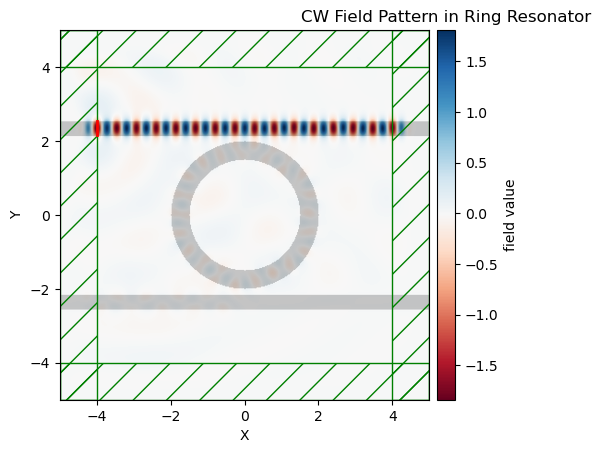

In [9]:
import meep as mp
import numpy as np
import matplotlib.pyplot as plt

###############################################################################
# 基本參數
###############################################################################
resolution = 40
n_core = 3.45
n_bg = 1.0

wvg_width = 0.4
outer_r = 2.0
inner_r = 1.5
gap = 0.15

cell = mp.Vector3(10, 10, 0)
pml = [mp.PML(1.0)]

###############################################################################
# 幾何結構：微環 + 上下波導
###############################################################################
geometry = [
    mp.Block(size=mp.Vector3(mp.inf, wvg_width, mp.inf),
             center=mp.Vector3(0, outer_r + gap + wvg_width/2),
             material=mp.Medium(index=n_core)),

    mp.Block(size=mp.Vector3(mp.inf, wvg_width, mp.inf),
             center=mp.Vector3(0, -outer_r - gap - wvg_width/2),
             material=mp.Medium(index=n_core)),

    mp.Cylinder(radius=outer_r,
                center=mp.Vector3(0,0),
                height=mp.inf,
                material=mp.Medium(index=n_core)),

    mp.Cylinder(radius=inner_r,
                center=mp.Vector3(0,0),
                height=mp.inf,
                material=mp.Medium(index=n_bg)),
]

###############################################################################
# 單頻連續波光源 (Continuous Wave)
###############################################################################
fcen = 0.6

sources = [
    mp.Source(
        src=mp.ContinuousSource(frequency=fcen),
        component=mp.Ez,
        center=mp.Vector3(-4, outer_r + gap + wvg_width/2),
        size=mp.Vector3(0, wvg_width),
        amplitude=10.0
    )
]

###############################################################################
# 建立模擬
###############################################################################
sim = mp.Simulation(
    cell_size=cell,
    geometry=geometry,
    sources=sources,
    resolution=resolution,
    boundary_layers=pml
)

###############################################################################
# 執行模擬：時間拉長讓場達到 steady state
###############################################################################
sim.run(until=2000)

###############################################################################
# 畫 Ez 場分布
###############################################################################
sim.plot2D(fields=mp.Ez,
           field_parameters={"cmap": "RdBu", "colorbar": True})
plt.title("CW Field Pattern in Ring Resonator")
plt.show()


==== Ring Resonance Mode Calculation ====
m=30,  wavelength=1.131,  freq=0.884
m=31,  wavelength=1.094,  freq=0.914
m=32,  wavelength=1.060,  freq=0.943
m=33,  wavelength=1.028,  freq=0.973
m=34,  wavelength=0.998,  freq=1.002
m=35,  wavelength=0.969,  freq=1.032
m=36,  wavelength=0.942,  freq=1.061
m=37,  wavelength=0.917,  freq=1.091
m=38,  wavelength=0.893,  freq=1.120
m=39,  wavelength=0.870,  freq=1.149
m=40,  wavelength=0.848,  freq=1.179

Using resonance frequency: 1.0315598163363586
-----------
Initializing structure...
time for choose_chunkdivision = 0.000390053 s
Working in 2D dimensions.
Computational cell is 10 x 10 x 0 with resolution 40
     block, center = (0,2.35,0)
          size (1e+20,0.4,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (11.9025,11.9025,11.9025)
     block, center = (0,-2.35,0)
          size (1e+20,0.4,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (11.

FloatProgress(value=0.0, description='0% done ', max=2000.0)

Meep progress: 62.050000000000004/2000.0 = 3.1% done in 4.0s, 124.9s to go
on time step 4969 (time=62.1125), 0.000805125 s/step
Meep progress: 132.975/2000.0 = 6.6% done in 8.0s, 112.3s to go
on time step 10649 (time=133.113), 0.0007043 s/step
Meep progress: 217.51250000000002/2000.0 = 10.9% done in 12.0s, 98.3s to go
on time step 17415 (time=217.688), 0.000591258 s/step
Meep progress: 302.46250000000003/2000.0 = 15.1% done in 16.0s, 89.8s to go
on time step 24213 (time=302.663), 0.000588418 s/step
Meep progress: 388.8/2000.0 = 19.4% done in 20.0s, 82.9s to go
on time step 31123 (time=389.038), 0.000578934 s/step
Meep progress: 474.45000000000005/2000.0 = 23.7% done in 24.0s, 77.2s to go
on time step 37978 (time=474.725), 0.000583568 s/step
Meep progress: 560.375/2000.0 = 28.0% done in 28.0s, 71.9s to go
on time step 44856 (time=560.7), 0.000581651 s/step
Meep progress: 646.4375/2000.0 = 32.3% done in 32.0s, 67.0s to go
on time step 51746 (time=646.825), 0.00058062 s/step
Meep progress

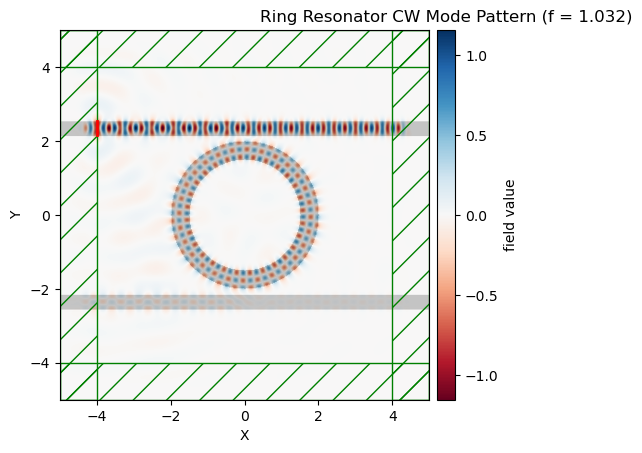

In [7]:
import meep as mp
import numpy as np
import matplotlib.pyplot as plt

###############################################################################
# 基本參數
###############################################################################
resolution = 40
n_core = 3.45
n_bg = 1.0
neff = 2.7       # 有效折射率 (估計值)

wvg_width = 0.4
outer_r = 2.0
inner_r = 1.5
gap = 0.15

cell = mp.Vector3(10, 10, 0)
pml = [mp.PML(1.0)]

###############################################################################
# 計算 30~40 模態的共振頻率
###############################################################################
m_list = np.arange(30, 41)
L = 2 * np.pi * outer_r         # 環的周長

lambda_list = L * neff / m_list # 共振波長
freq_list = 1 / lambda_list     # 共振頻率

print("==== Ring Resonance Mode Calculation ====")
for m, lam, f in zip(m_list, lambda_list, freq_list):
    print(f"m={m:2d},  wavelength={lam:.3f},  freq={f:.3f}")

# 選擇最適合耦合的頻率（m=35 模態）
fcen = freq_list[5]   # m=35 對應 index=5
print("\nUsing resonance frequency:", fcen)

###############################################################################
# 定義結構：環形 + 上下波導
###############################################################################
geometry = [
    # 上波導
    mp.Block(size=mp.Vector3(mp.inf, wvg_width, mp.inf),
             center=mp.Vector3(0, outer_r + gap + wvg_width/2),
             material=mp.Medium(index=n_core)),

    # 下波導
    mp.Block(size=mp.Vector3(mp.inf, wvg_width, mp.inf),
             center=mp.Vector3(0, -outer_r - gap - wvg_width/2),
             material=mp.Medium(index=n_core)),

    # 外環
    mp.Cylinder(radius=outer_r,
                center=mp.Vector3(0, 0),
                height=mp.inf,
                material=mp.Medium(index=n_core)),

    # 內環（空氣）
    mp.Cylinder(radius=inner_r,
                center=mp.Vector3(0, 0),
                height=mp.inf,
                material=mp.Medium(index=n_bg)),
]

###############################################################################
# 單頻連續波光源 (Continuous Wave)
###############################################################################
sources = [
    mp.Source(
        src=mp.ContinuousSource(frequency=fcen),
        component=mp.Ez,
        center=mp.Vector3(-4, outer_r + gap + wvg_width/2),
        size=mp.Vector3(0, wvg_width),
        amplitude=5.0
    )
]

###############################################################################
# 建立模擬
###############################################################################
sim = mp.Simulation(
    cell_size=cell,
    geometry=geometry,
    sources=sources,
    resolution=resolution,
    boundary_layers=pml
)

###############################################################################
# 執行模擬 — 拉長時間讓場達穩態 (steady-state)
###############################################################################
sim.run(until=2000)

###############################################################################
# 畫 Ez 場分布
###############################################################################
sim.plot2D(fields=mp.Ez,
           field_parameters={"cmap": "RdBu", "colorbar": True})

plt.title(f"Ring Resonator CW Mode Pattern (f = {fcen:.3f})")
plt.show()


-----------
Initializing structure...
time for choose_chunkdivision = 0.000678062 s
Working in 2D dimensions.
Computational cell is 20 x 20 x 0 with resolution 30
     block, center = (0,2.35,0)
          size (10,0.4,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (11.9025,11.9025,11.9025)
     block, center = (0,-2.35,0)
          size (10,0.4,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (11.9025,11.9025,11.9025)
     cylinder, center = (0,0,0)
          radius 2, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (11.9025,11.9025,11.9025)
     cylinder, center = (0,0,0)
          radius 1.5, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (-4,-4.7,0)
          radius 2, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (11.9025,11.9025,11.9025)
     cylinder, center = 

FloatProgress(value=0.0, description='0% done ', max=2000.0)

Meep progress: 3.5666666666666664/2000.0 = 0.2% done in 4.0s, 2249.6s to go
on time step 214 (time=3.56667), 0.0187018 s/step
Meep progress: 7.183333333333334/2000.0 = 0.4% done in 8.0s, 2224.8s to go
on time step 432 (time=7.2), 0.0184416 s/step
Meep progress: 10.783333333333333/2000.0 = 0.5% done in 12.0s, 2218.9s to go
on time step 648 (time=10.8), 0.0185294 s/step
Meep progress: 14.383333333333333/2000.0 = 0.7% done in 16.0s, 2214.0s to go
on time step 864 (time=14.4), 0.0186014 s/step
Meep progress: 17.966666666666665/2000.0 = 0.9% done in 20.1s, 2212.4s to go
on time step 1079 (time=17.9833), 0.0186317 s/step
Meep progress: 24.433333333333334/2000.0 = 1.2% done in 24.1s, 1945.3s to go
on time step 1469 (time=24.4833), 0.0102781 s/step
Meep progress: 32.0/2000.0 = 1.6% done in 28.1s, 1725.8s to go
on time step 1923 (time=32.05), 0.0088115 s/step
Meep progress: 39.65/2000.0 = 2.0% done in 32.1s, 1585.4s to go
on time step 2382 (time=39.7), 0.00871686 s/step
Meep progress: 47.283333

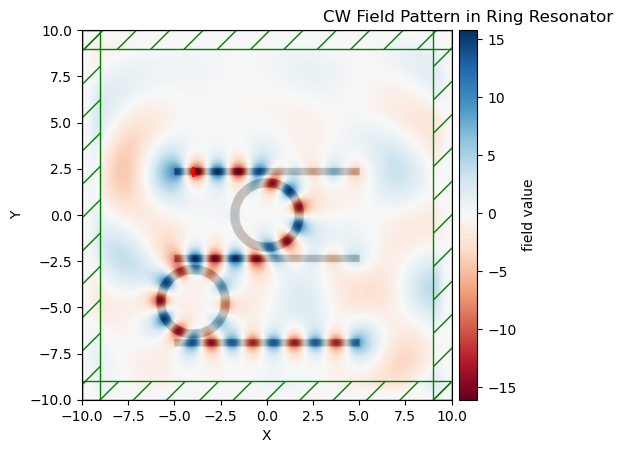

In [1]:
import meep as mp
import numpy as np
import matplotlib.pyplot as plt

###############################################################################
# 基本參數
###############################################################################
resolution = 30
n_core = 3.45
n_bg = 1.0

wvg_length = 10
wvg_width = 0.4
outer_r = 2.0
inner_r = 1.5
gap = 0.15

cell = mp.Vector3(20, 20, 0)
pml = [mp.PML(1.0)]

###############################################################################
# 幾何結構：微環 + 上下波導
###############################################################################
geometry = [
    mp.Block(size=mp.Vector3(wvg_length, wvg_width, mp.inf),
             center=mp.Vector3(0, outer_r + gap + wvg_width/2),
             material=mp.Medium(index=n_core)),

    mp.Block(size=mp.Vector3(wvg_length, wvg_width, mp.inf),
             center=mp.Vector3(0, -outer_r - gap - wvg_width/2),
             material=mp.Medium(index=n_core)),

    mp.Cylinder(radius=outer_r,
                center=mp.Vector3(0,0),
                height=mp.inf,
                material=mp.Medium(index=n_core)),

    mp.Cylinder(radius=inner_r,
                center=mp.Vector3(0,0),
                height=mp.inf,
                material=mp.Medium(index=n_bg)),
    
    mp.Cylinder(radius=outer_r,
                center=mp.Vector3(-outer_r*2,-2*outer_r - 2*gap - wvg_width),
                height=mp.inf,
                material=mp.Medium(index=n_core)),
    
    mp.Cylinder(radius=inner_r,
                center=mp.Vector3(-outer_r*2,-2*outer_r - 2*gap - wvg_width),
                height=mp.inf,
                material=mp.Medium(index=n_bg)),
    mp.Block(size=mp.Vector3(wvg_length, wvg_width, mp.inf),
             center=mp.Vector3(0, -outer_r*3 - gap*2 - wvg_width/2*3),
             material=mp.Medium(index=n_core)),
]

###############################################################################
# 單頻連續波光源 (Continuous Wave)
###############################################################################
fcen = 0.198

sources = [
    mp.Source(
        src=mp.ContinuousSource(frequency=fcen),
        component=mp.Ez,
        center=mp.Vector3(-4, outer_r + gap + wvg_width/2),
        size=mp.Vector3(0, wvg_width),
        amplitude=50.0
    )
]

###############################################################################
# 建立模擬
###############################################################################
sim = mp.Simulation(
    cell_size=cell,
    geometry=geometry,
    sources=sources,
    resolution=resolution,
    boundary_layers=pml
)

###############################################################################
# 執行模擬：時間拉長讓場達到 steady state
###############################################################################
sim.run(until=2000)

###############################################################################
# 畫 Ez 場分布
###############################################################################
sim.plot2D(fields=mp.Ez,
           field_parameters={"cmap": "RdBu", "colorbar": True})
plt.title("CW Field Pattern in Ring Resonator")
plt.show()

